<a href="https://colab.research.google.com/github/OjashShakya/Ojash_Shakya_2408654_AI_Workshops/blob/main/2408654_OjashShakya_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ojash Shakya

ID: 2408654

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

 # 1. Exploratory Data Analysis and Data Understanding

## Choosing a Dataset:

Loading Dataset

In [3]:
# Kaggle Link: https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity/data
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/Coursework/courseworkDatasets/anxietyAttackDataset.csv")

Displaying Basic Information of Dataset

In [4]:
df

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


In [5]:
print(df.shape)

(12000, 20)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

## Conducting Exploratory Data Analysis (EDA):

Check data of all columns

In [7]:
df.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)'],
      dtype='object')

Identify non-numeric columns

In [8]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object')


Unique Values

In [9]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Gender': ['Female' 'Male' 'Other']
Unique values in column 'Occupation': ['Other' 'Teacher' 'Doctor' 'Student' 'Unemployed' 'Engineer']
Unique values in column 'Smoking': ['No' 'Yes']
Unique values in column 'Family History of Anxiety': ['No' 'Yes']
Unique values in column 'Dizziness': ['No' 'Yes']
Unique values in column 'Medication': ['No' 'Yes']
Unique values in column 'Recent Major Life Event': ['Yes' 'No']


In [10]:
df["Severity of Anxiety Attack (1-10)"].value_counts()

,count
Severity of Anxiety Attack (1-10),
5,1254
7,1224
6,1224
4,1202
1,1201
9,1191
10,1187
8,1187
2,1175


Statistical Analysis

In [11]:
df.describe()

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


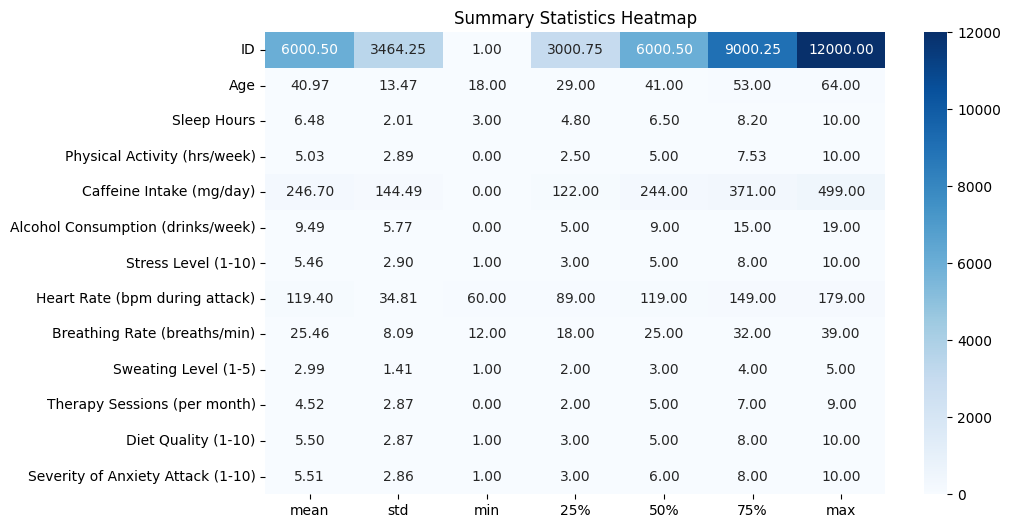

In [12]:
desc = df.describe().T
plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Summary Statistics Heatmap')
plt.show()

### Data Cleaning and Preprocessing:


Removing Unecessary Features

In [13]:
df.drop(['ID','Occupation', 'Gender'], axis=1, inplace=True)

Checking for Duplicate Values

In [14]:
df.drop_duplicates(inplace=True);
df.duplicated().sum()

0

Checking for Missing Values

In [15]:
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

,0
Age,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0
Stress Level (1-10),0
Heart Rate (bpm during attack),0
Breathing Rate (breaths/min),0


Feature and Target Selection

In [16]:
X = df.drop('Severity of Anxiety Attack (1-10)', axis=1)
print("Features (X):\n", X.head())
y = df['Severity of Anxiety Attack (1-10)']
print("\nTarget (y):\n", y.head())

Features (X):
    Age  Sleep Hours  Physical Activity (hrs/week)  Caffeine Intake (mg/day)  \
0   56          9.6                           8.3                       175   
1   46          6.4                           7.3                        97   
2   32          6.9                           1.0                       467   
3   60          9.2                           3.7                       471   
4   25          9.2                           2.5                       364   

   Alcohol Consumption (drinks/week) Smoking Family History of Anxiety  \
0                                  6      No                        No   
1                                  6      No                        No   
2                                 14      No                        No   
3                                 16      No                       Yes   
4                                  2      No                       Yes   

   Stress Level (1-10)  Heart Rate (bpm during attack)  \
0      

### Data Visualization and Charts

Histograms for numerical features

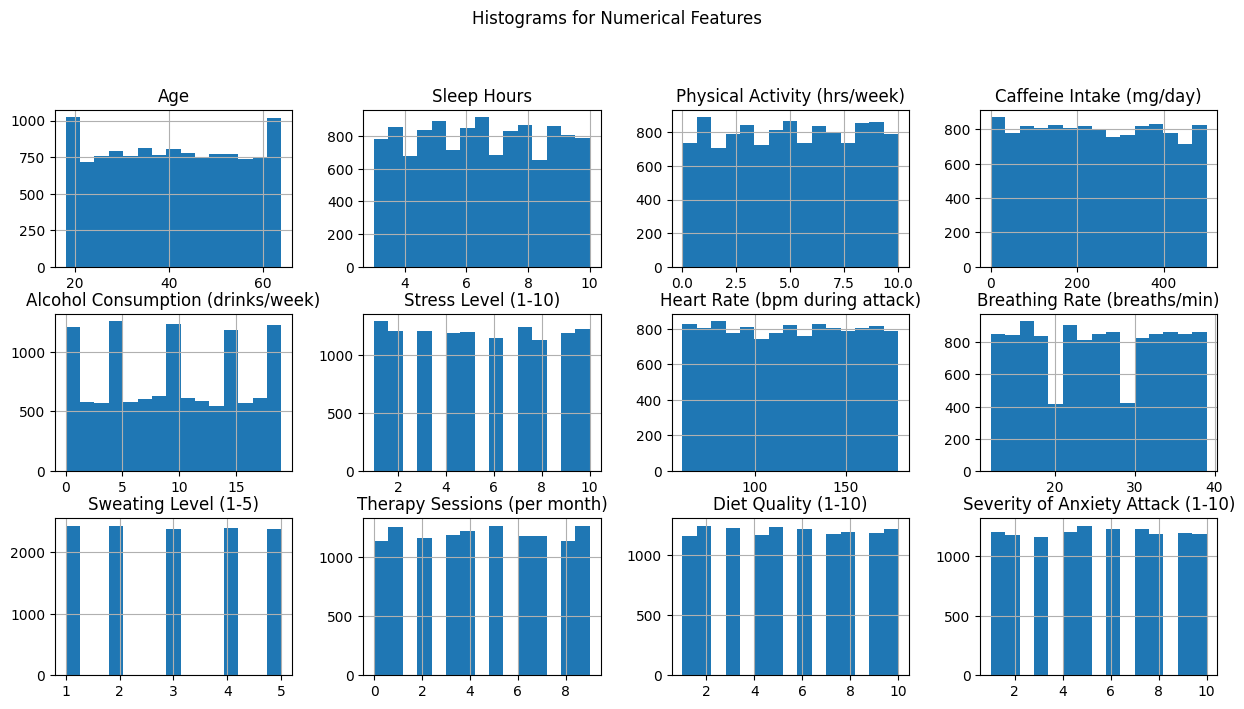

In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms for Numerical Features')
plt.show()

Boxplot for numerical columns to check for outliers

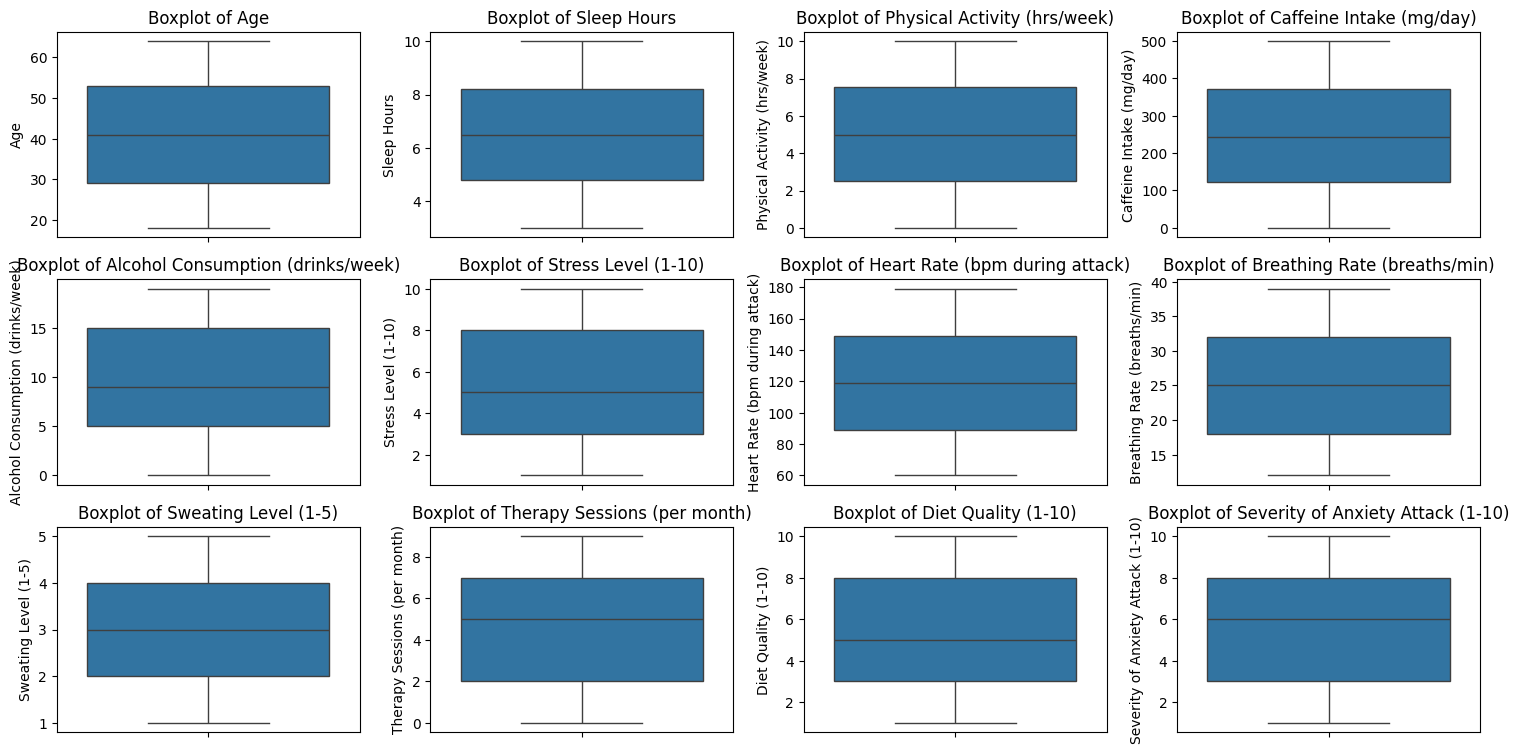

In [18]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Balance distribution of Target

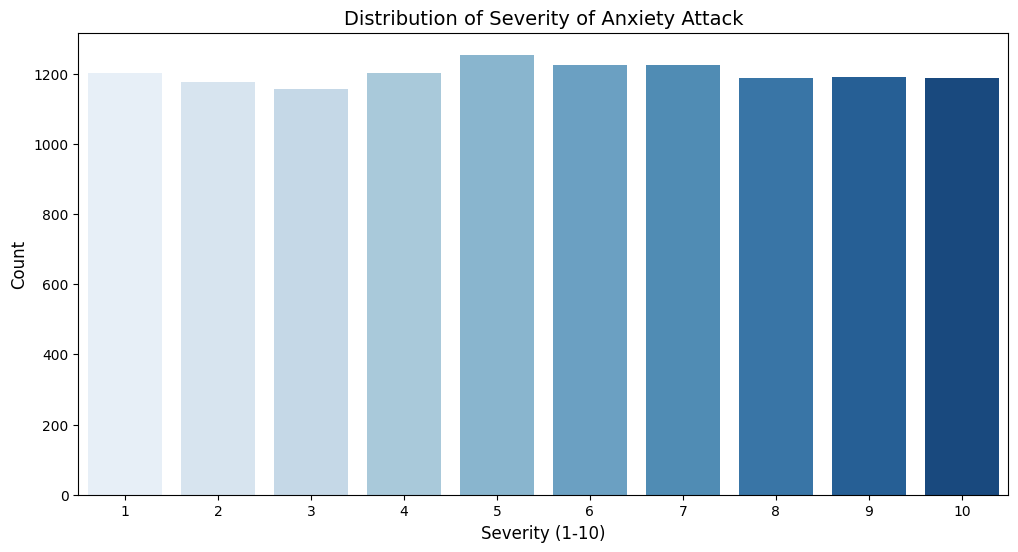

In [19]:
plt.figure(figsize=(12, 6))
severity_counts = df['Severity of Anxiety Attack (1-10)'].value_counts().sort_index()
colors = sns.color_palette("Blues", n_colors=len(severity_counts))
sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette=colors, legend=False)
plt.title('Distribution of Severity of Anxiety Attack', fontsize=14)
plt.xlabel('Severity (1-10)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Correlation matrix for numerical features

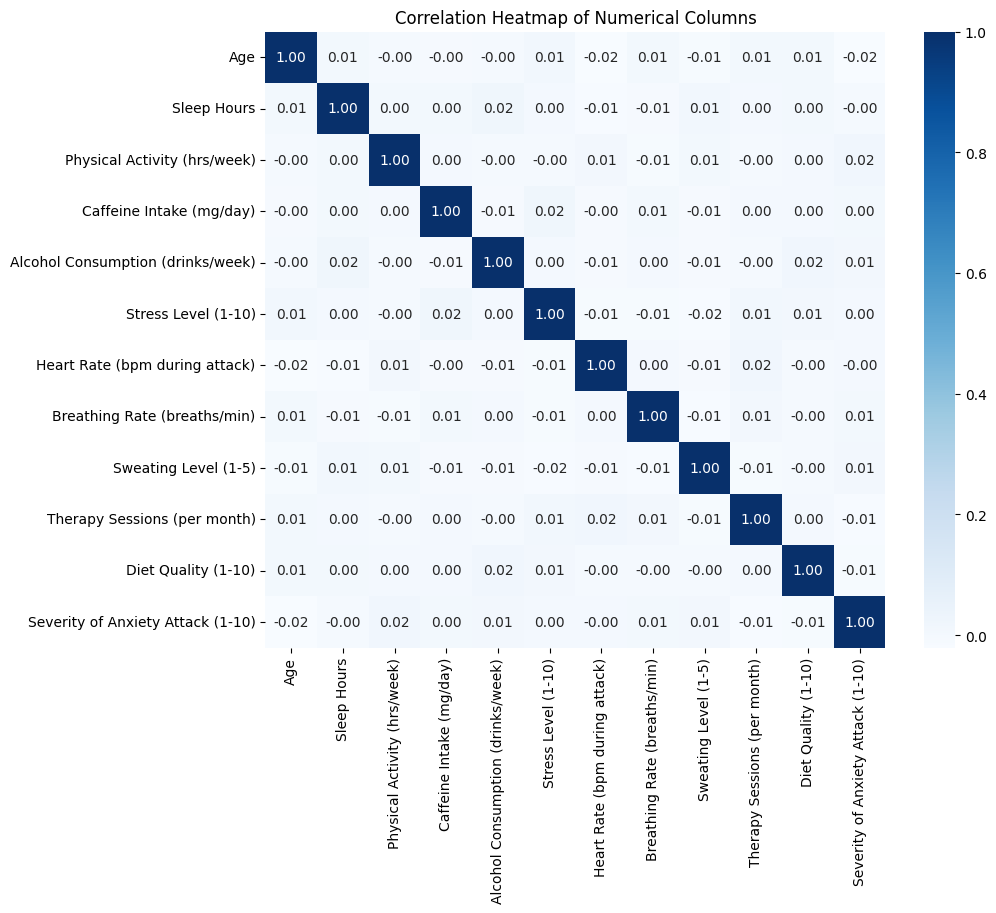

In [20]:
corr_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

#  2. Building a Model from Scratch

Unique values of column

In [21]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Smoking': ['No' 'Yes']
Unique values in column 'Family History of Anxiety': ['No' 'Yes']
Unique values in column 'Dizziness': ['No' 'Yes']
Unique values in column 'Medication': ['No' 'Yes']
Unique values in column 'Recent Major Life Event': ['Yes' 'No']


Converting categorical variables to numeric values

In [22]:
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['Family History of Anxiety'] = df['Family History of Anxiety'].map({'Yes': 1, 'No': 0})
df['Dizziness'] = df['Dizziness'].map({'Yes': 1, 'No': 0})
df['Medication'] = df['Medication'].map({'Yes': 1, 'No': 0})
df['Recent Major Life Event'] = df['Recent Major Life Event'].map({'Yes': 1, 'No': 0})

print(df.dtypes)

Age                                    int64
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                                int64
Family History of Anxiety              int64
Stress Level (1-10)                    int64
Heart Rate (bpm during attack)         int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                              int64
Medication                             int64
Therapy Sessions (per month)           int64
Recent Major Life Event                int64
Diet Quality (1-10)                    int64
Severity of Anxiety Attack (1-10)      int64
dtype: object


Normalize numerical features using min-max scaling or standardization


In [23]:
numerical_features = ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
                      'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
                      'Stress Level (1-10)', 'Heart Rate (bpm during attack)',
                      'Breathing Rate (breaths/min)', 'Sweating Level (1-5)',
                      'Diet Quality (1-10)','Smoking', 'Family History of Anxiety']

for feature in numerical_features:
    df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

Define features and target variable


In [24]:
features = numerical_features
X = df[features].astype(np.float64).values
Y = np.where(df['Severity of Anxiety Attack (1-10)'] > 5, 'High', 'Low') # Create binary target variable: Severity > 5 -> 'High'; else -> 'Low'

Logistic Regression Model from Scratch

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(y_true, y_pred):
    m = len(y_true)
    cost = - (1 / m) * np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))
    return cost

Y_numeric = np.where(Y == 'High', 1, 0) # Convert target to numerical values (0 and 1)

def gradient_descent(X, Y_numeric, w, b, alpha, n_iter):
    m = len(Y_numeric)
    cost_history = []

    for i in range(n_iter):
        z = np.dot(X, w) + b
        A = sigmoid(z)

        dw = (1 / m) * np.dot(X.T, (A - Y_numeric))
        db = (1 / m) * np.sum(A - Y_numeric)

        w -= alpha * dw
        b -= alpha * db

        cost = compute_cost(Y_numeric, A)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return w, b, cost_history

Split the dataset into training and testing sets

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Training the Model

In [27]:
# Initialize parameters
w_init = np.zeros(X.shape[1])
b_init = 0
Y_numeric = np.where(Y == 'High', 1, 0)
alpha = 0.01
n_iter = 1000
w_out, b_out, cost_history = gradient_descent(X, Y_numeric, w_init, b_init, alpha, n_iter)

Iteration 0, Cost: 0.6931471805599435
Iteration 100, Cost: 0.6929139803670183
Iteration 200, Cost: 0.692772951587182
Iteration 300, Cost: 0.6926876259681212
Iteration 400, Cost: 0.6926359774734607
Iteration 500, Cost: 0.6926046993409178
Iteration 600, Cost: 0.6925857488610851
Iteration 700, Cost: 0.6925742624451956
Iteration 800, Cost: 0.6925672974286963
Iteration 900, Cost: 0.6925630724727319


Prediciting the model

In [28]:
def predict(X_test, w_out, b_out):
        z = np.dot(X_test, w_out) + b_out
        y_prob = sigmoid(z)
        return np.where(y_prob >= 0.5, 'High', 'Low')

Predict on test set using trained weights and bias

In [29]:
y_pred_test = predict(x_test, w_out, b_out)
y_pred_train = predict(x_train, w_out, b_out)

# Check shapes of predictions and labels
print(f"Shape of y_pred_train: {y_pred_train.shape}")
print(f"Shape of y_pred_test: {y_pred_test.shape}")

# Calculate accuracy on train data
train_accuracy = np.mean(y_pred_train == y_train) * 100
print(f"\nTrain Accuracy: {train_accuracy:.2f}%")

# Calculate accuracy on test data
test_accuracy = np.mean(y_pred_test == y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Shape of y_pred_train: (9600,)
Shape of y_pred_test: (2400,)

Train Accuracy: 51.18%
Test Accuracy: 52.58%


Calculate accuracy score manually


In [30]:
accuracy = np.mean(y_pred_test == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5258333333333334


In [31]:
y_pred_test = predict(x_test, w_out, b_out)
cm = confusion_matrix(y_test, y_pred_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", cm)


Classification Report:
               precision    recall  f1-score   support

        High       0.53      0.54      0.54      1211
         Low       0.52      0.51      0.52      1189

    accuracy                           0.53      2400
   macro avg       0.53      0.53      0.53      2400
weighted avg       0.53      0.53      0.53      2400

Confusion Matrix:
 [[655 556]
 [582 607]]


Confusion matrix heatmap

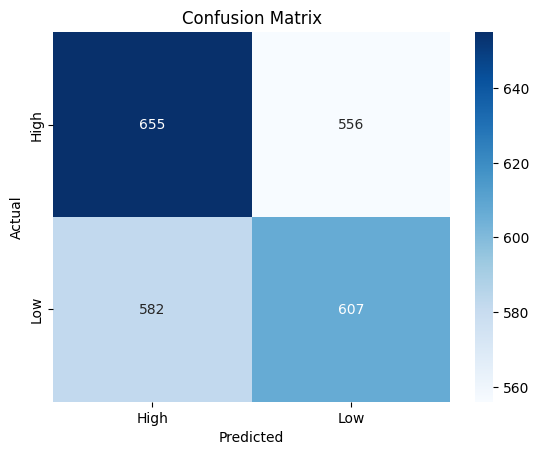

In [32]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Build a Primary Model

## Models:

### Using Random Forest Classifier

In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) # random forest classifer object
rf.fit(x_train, y_train)# train the model
y_pred_rf = rf.predict(x_test) # predit the test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)# check the performance
print("Random Forest Accuracy:", accuracy_rf)
# Display the classifiction report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm_rf)

Random Forest Accuracy: 0.48791666666666667

Classification Report:
               precision    recall  f1-score   support

        High       0.49      0.51      0.50      1211
         Low       0.48      0.46      0.47      1189

    accuracy                           0.49      2400
   macro avg       0.49      0.49      0.49      2400
weighted avg       0.49      0.49      0.49      2400


Confusion Matrix:
 [[619 592]
 [637 552]]


### Using Gradient Boosting Classifier

In [34]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42) # gradient bossting object
gb.fit(x_train, y_train) # train the model
y_pred_gb = gb.predict(x_test) # predit the test data
accuracy_gb = accuracy_score(y_test, y_pred_gb) # check the performance
print("Gradient Boosting Accuracy:", accuracy_gb)
# Display the classifiction report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix:\n", cm_gb)

Gradient Boosting Accuracy: 0.5070833333333333

Classification Report:
               precision    recall  f1-score   support

        High       0.51      0.50      0.50      1211
         Low       0.50      0.52      0.51      1189

    accuracy                           0.51      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.51      0.51      0.51      2400


Confusion Matrix:
 [[602 609]
 [574 615]]


## Model Comparison:

### Confusion Matrix

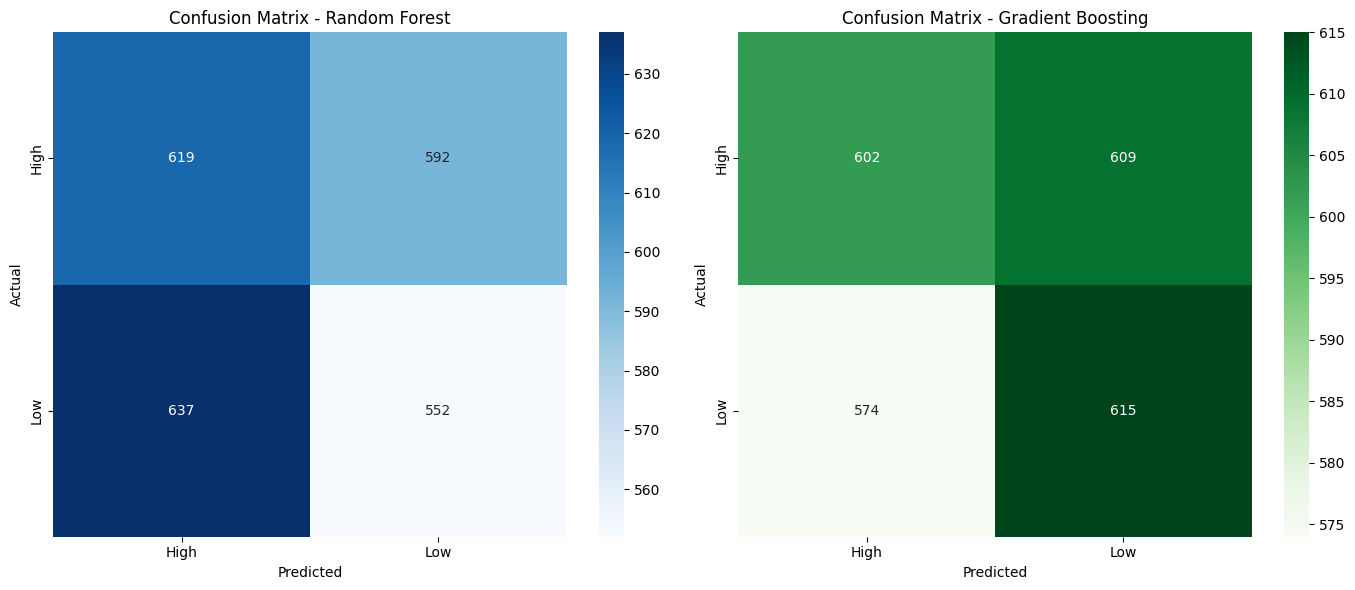

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# For Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), ax=axes[0])
axes[0].set_title('Confusion Matrix - Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
# For Gradient Boosting
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), ax=axes[1])
axes[1].set_title('Confusion Matrix - Gradient Boosting')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### ROC Curve

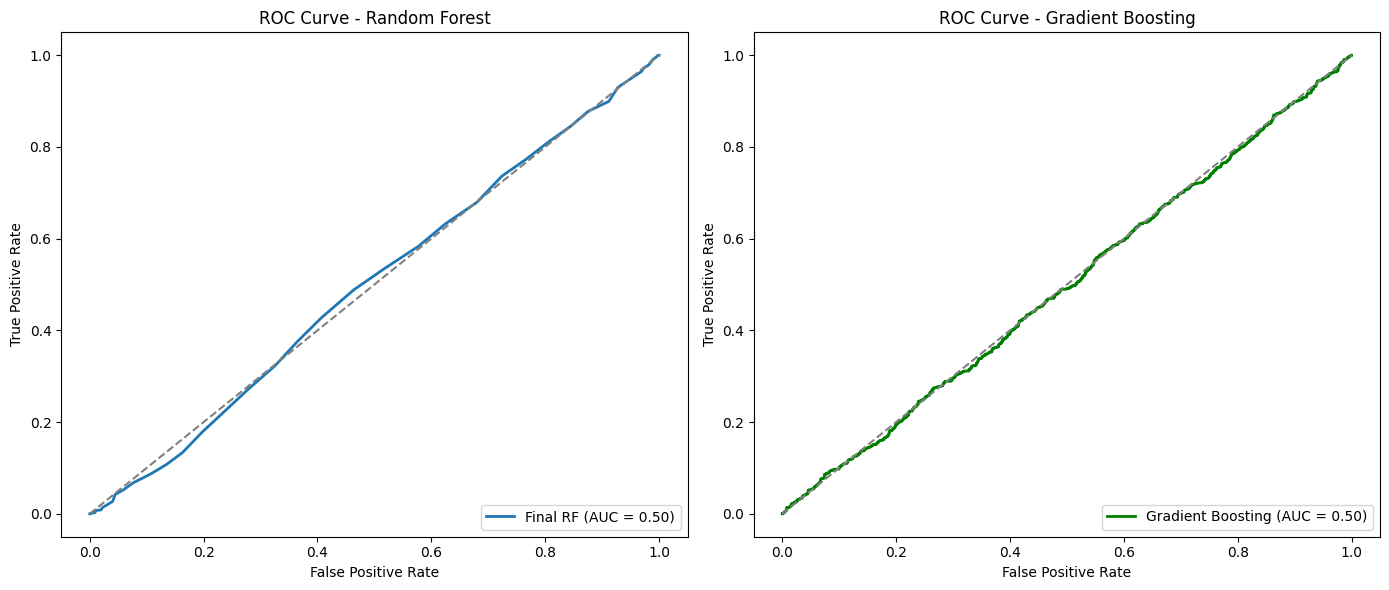

In [36]:
y_scores_rf = rf.predict_proba(x_test)[:, 1]
y_scores_gb = gb.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf, pos_label='High')
roc_auc_rf = auc(fpr_rf, tpr_rf)
# Compute ROC curve and AUC for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb, pos_label='High')
roc_auc_gb = auc(fpr_gb, tpr_gb)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# For Random Forest
axes[0].plot(fpr_rf, tpr_rf, lw=2, label=f'Final RF (AUC = {roc_auc_rf:.2f})')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Random Forest')
axes[0].legend(loc="lower right")
# For Gradient Boosting
axes[1].plot(fpr_gb, tpr_gb, lw=2, color='green', label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - Gradient Boosting')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

 # 4. Hyper-parameter Optimization

### For Random Forest

In [37]:
rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = RandomizedSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)
rf_grid.fit(x_train, y_train)
print("Best hyperparameters for Random Forest:", rf_grid.best_params_)

Best hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None}


### For Gradient Boosting

In [38]:
gb = GradientBoostingClassifier()
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
gb_grid = RandomizedSearchCV(gb, gb_param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)
gb_grid.fit(x_train, y_train)
print("Best hyperparameters for Gradient Boosting:", gb_grid.best_params_)

Best hyperparameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.1}


# 5. Feature Selection

### For Random Forest

In [39]:
clf_model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model_rf.fit(x_train, y_train)

feature_importances_rf = pd.Series(clf_model_rf.feature_importances_, index=features)
feature_importances_rf.sort_values(ascending=False, inplace=True)
print("Feature importances (Random Forest):")
print(feature_importances_rf)

top_features_rf = feature_importances_rf.head(8).index
print(top_features_rf)

Feature importances (Random Forest):
Caffeine Intake (mg/day)             0.131172
Heart Rate (bpm during attack)       0.121652
Physical Activity (hrs/week)         0.119032
Sleep Hours                          0.116771
Age                                  0.105120
Breathing Rate (breaths/min)         0.097561
Alcohol Consumption (drinks/week)    0.088642
Stress Level (1-10)                  0.068776
Diet Quality (1-10)                  0.066995
Sweating Level (1-5)                 0.047356
Smoking                              0.018773
Family History of Anxiety            0.018151
dtype: float64
Index(['Caffeine Intake (mg/day)', 'Heart Rate (bpm during attack)',
       'Physical Activity (hrs/week)', 'Sleep Hours', 'Age',
       'Breathing Rate (breaths/min)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)'],
      dtype='object')


### For Gradient Boosting

In [40]:
clf_model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
clf_model_gb.fit(x_train, y_train)

feature_importances_gb = pd.Series(clf_model_gb.feature_importances_, index=features)
feature_importances_gb.sort_values(ascending=False, inplace=True)
print("\nFeature importances (Gradient Boosting):")
print(feature_importances_gb)

top_features_gb = feature_importances_gb.head(8).index
print("\nTop 8 features (Gradient Boosting):")
print(top_features_gb)


Feature importances (Gradient Boosting):
Caffeine Intake (mg/day)             0.189164
Physical Activity (hrs/week)         0.150251
Age                                  0.126022
Heart Rate (bpm during attack)       0.111316
Sleep Hours                          0.092498
Alcohol Consumption (drinks/week)    0.072483
Stress Level (1-10)                  0.070678
Breathing Rate (breaths/min)         0.059924
Diet Quality (1-10)                  0.058454
Sweating Level (1-5)                 0.037118
Family History of Anxiety            0.018306
Smoking                              0.013787
dtype: float64

Top 8 features (Gradient Boosting):
Index(['Caffeine Intake (mg/day)', 'Physical Activity (hrs/week)', 'Age',
       'Heart Rate (bpm during attack)', 'Sleep Hours',
       'Alcohol Consumption (drinks/week)', 'Stress Level (1-10)',
       'Breathing Rate (breaths/min)'],
      dtype='object')


# 6. Final Model

### Final Random Forest model

In [41]:
# Select top features
X_train_top_features_rf = x_train[:, [features.index(feature) for feature in top_features_rf]]
X_test_top_features_rf = x_test[:, [features.index(feature) for feature in top_features_rf]]

# Build and train the final model
final_rf_model = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
final_rf_model.fit(X_train_top_features_rf, y_train)

# Predict and evaluate
y_pred_train_final_rf = final_rf_model.predict(X_train_top_features_rf)
y_pred_final_rf = final_rf_model.predict(X_test_top_features_rf)

print("Final Random Forest Evaluation:")
print(f"Train Accuracy: {(accuracy_score(y_train, y_pred_train_final_rf) * 100):.2f}%")
print(f"Test Accuracy: {(accuracy_score(y_test, y_pred_final_rf) * 100):.2f}%")
print(classification_report(y_test, y_pred_final_rf))
print("Final Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_final_rf))

Final Random Forest Evaluation:
Train Accuracy: 99.81%
Test Accuracy: 49.58%
              precision    recall  f1-score   support

        High       0.50      0.50      0.50      1211
         Low       0.49      0.49      0.49      1189

    accuracy                           0.50      2400
   macro avg       0.50      0.50      0.50      2400
weighted avg       0.50      0.50      0.50      2400

Final Confusion Matrix (Random Forest):
[[605 606]
 [604 585]]


### Final Gradient Boosting model

In [42]:
# Select top features
X_train_top_features_gb = x_train[:, [features.index(feature) for feature in top_features_gb]]
X_test_top_features_gb = x_test[:, [features.index(feature) for feature in top_features_gb]]

# Build and train the final model
final_gb_model = GradientBoostingClassifier(**gb_grid.best_params_, random_state=42)
final_gb_model.fit(X_train_top_features_gb, y_train)

y_pred_train_final_gb = final_gb_model.predict(X_train_top_features_gb)
y_pred_final_gb = final_gb_model.predict(X_test_top_features_gb)

print("\nFinal Gradient Boosting Evaluation:")
print(f"Train Accuracy: {(accuracy_score(y_train, y_pred_train_final_gb) * 100):.2f}%")
print(f"Test Accuracy: {(accuracy_score(y_test, y_pred_final_gb) * 100):.2f}%")
print(classification_report(y_test, y_pred_final_gb))
print("Final Confusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_final_gb))


Final Gradient Boosting Evaluation:
Train Accuracy: 61.64%
Test Accuracy: 49.96%
              precision    recall  f1-score   support

        High       0.50      0.49      0.50      1211
         Low       0.50      0.51      0.50      1189

    accuracy                           0.50      2400
   macro avg       0.50      0.50      0.50      2400
weighted avg       0.50      0.50      0.50      2400

Final Confusion Matrix (Gradient Boosting):
[[594 617]
 [584 605]]


### Final Model Comparison using ROC Curve - Random Forest

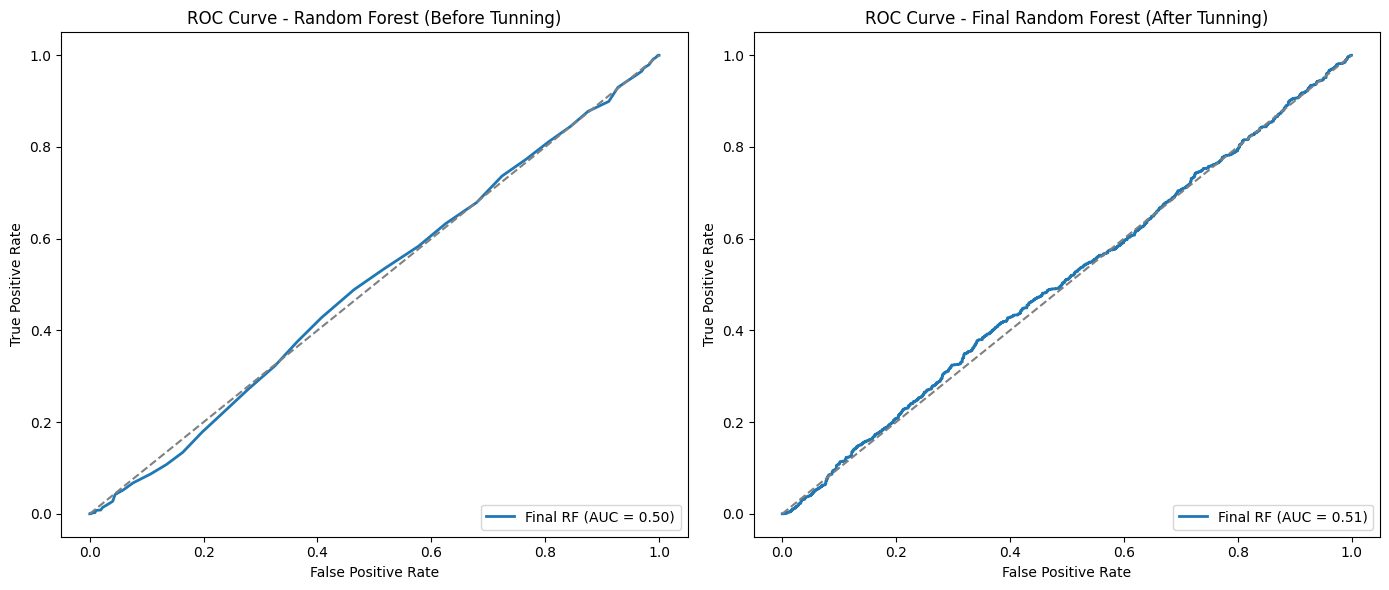

In [43]:
y_scores_final_rf = final_rf_model.predict_proba(X_test_top_features_rf)[:, 1]
# Compute ROC curve and AUC for Final Random Forest
fpr_final_rf, tpr_final_rf, _ = roc_curve(y_test, y_scores_final_rf, pos_label='High')
roc_auc_final_rf = auc(fpr_final_rf, tpr_final_rf)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# For Random Forest - Before Tunning
axes[0].plot(fpr_rf, tpr_rf, lw=2, label=f'Final RF (AUC = {roc_auc_rf:.2f})')
axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Random Forest (Before Tunning)')
axes[0].legend(loc="lower right")
# For Final Random Forest - After Tunning
axes[1].plot(fpr_final_rf, tpr_final_rf, lw=2, label=f'Final RF (AUC = {roc_auc_final_rf:.2f})')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve - Final Random Forest (After Tunning)')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()